In [277]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [279]:
from extract_data import *

# RAPPEL MÉTRIQUES
--> elles se décomposent en **micro**, **macro** et **weighted** en général
- micro en général pour la généralisation de la classification binaire à la multi-labels
- macro comme une moyenne de la métrique sur chacun des labels (les labels sont donc supposés équitablement répartis dans l'échantillon) 
- weighted: on fait une moyenne pondérée de la métrique où balance par le poids ie la fréquence d'apparition du label.

\
Ici on choisira **micro**

 On rappelle également que: 
## Precision 
$$precision = \frac{TP}{TP+FP}$$ 
## Recall 
$$recall= \frac{TP}{TP+FN} $$
## F1-score
 $$f1-score= \frac{precision * recall}{precision + recall} $$
## Hamming Loss
 hamming loss = la proportion de labels incorrets 
 
 
 



# Préparation des données

In [280]:
transform_parquet_to_csv('dataset2.parquet','dataset.csv')

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
song_index,,,,,,,,,,,,,,,,,,,,,
195,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
417,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
530,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
909,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
1257,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
49589,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
49689,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504


In [ ]:
df=pd.read_csv('dataset.csv')

In [283]:
df.shape

(50562, 408)

In [182]:
X,Y= extract_values_array(df,1)

## Mise en forme des résultats 


In [184]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score

In [185]:
def all_metrics(y_true,y_pred):
    acc=accuracy_score(y_true,y_pred)
    pre=precision_score(y_true,y_pred,average='micro')
    rec=recall_score(y_true,y_pred,average='micro')
    f1=f1_score(y_true,y_pred,average='micro')
    hl=hamming_loss(y_true,y_pred)
    r=[acc,pre,rec,f1,hl]
    return(r)

In [186]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

# Méthode 1: Naive - TOP GENRE 
Attribuer le genre le plus représenté: le rock




In [187]:
df_naif=pd.DataFrame(columns=l)
n=df.shape[0]
for label in l: 
  if label!='rock':
    df_naif[label]=np.zeros(n, dtype=int)
  else :
    df_naif[label]=np.zeros(n, dtype=int)+1
df_naif

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50558,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50559,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50560,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [188]:
y_pred = df_naif.values
y_true = df[l].values

In [189]:
r=all_metrics(y_true,y_pred)

In [190]:
final_res.loc['Top Genre']=r

# 2ème méthode: L régressions logistiques unilabel


In [191]:
from plot_unilabel import * 

## Sans sélection de variable (pénalisation Lasso) 

### Courbe ROC & AUC par label 

In [223]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
n=len(l)
i=0
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg2 = LogisticRegression(max_iter=10000)
    logreg2.fit(X_train,Y_train)
    y_hat= logreg2.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' unilabel Logistic Regression'
    name_fig= 'ROC_'+label+'_RL'
    AUC= plot_roc_curve(Y_test, y_hat, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

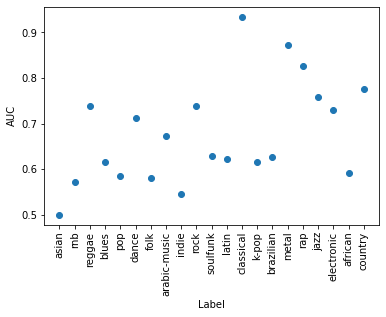

In [224]:
x=list(np.arange(1,22))
plt.scatter(x,auc_labels)
plt.xlabel('Label')
plt.xticks(x,l,rotation=90)
plt.ylabel('AUC')
plt.savefig("AUC for each label RL")


### Matrices de confusion par label

In [226]:
y_true=df_test.values
y_pred=df_hat.values

In [273]:
from sklearn.metrics import multilabel_confusion_matrix
conf=multilabel_confusion_matrix(y_true,y_pred)


In [269]:
import itertools

""" Fonction qui permet de plot la confusion matrix normalisée ou pas, choisir de save ou pas, title correspond ici au titre de la fig
et pas au nom du fichier, la matrice est plot dans le sens usuel ie [TP,FN]
                                                                    [FP,TN] """
def plot_confusion_matrix(cm,title,classes,cmap=plt.cm.Blues,normalize=False,save=False,name_fig=None):
    cm2=cm

    if normalize:
        cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
        for i in range (2):
            for j in range (2):
                cm2[i][j]=round(cm2[i][j],2)
    thresh = cm2.max() / 2.
    tmp=cm2[0][0]
    cm2[0][0]=cm2[1][1]
    cm2[1][1]=tmp
    tmp=cm2[0][1]
    cm2[0][1]=cm2[1][0]
    cm2[1][0]=tmp
    g=sns.heatmap(cm2,annot=True, fmt='.2%',cmap='Blues')
    if normalize: 
        s='Normalized confusion matrix '+title
        g.set_title(s)
    else:
        s='Not Normalized confusion matrix '+title
        g.set_title(s)
    g.set_xlabel('Predicted Label')
    g.set_ylabel('True Label')
    g.set_xticklabels(classes)
    g.set_yticklabels(classes)
    if save :
        plt.savefig(name_fig)
    else:
         plt.show()
    plt.clf()

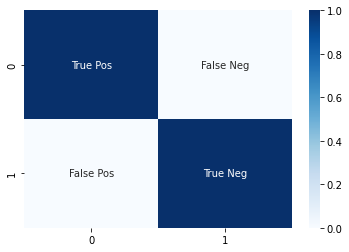

In [270]:
labels = ["True Pos","False Neg","False Pos","True Neg"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.eye(2), annot=labels, fmt="", cmap='Blues')
plt.savefig('Modèle Matrice de Confusion')

In [271]:
i=0
for cm in conf:
    label=l[i]
    t= label + ' Logistic Regression'
    name_fig= 'CM LR '+ label
    plot_confusion_matrix(cm,title=t,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

### Résultats: Union des prédictions --> Multilabels

In [274]:
r=all_metrics(y_true,y_pred)
final_res.loc['Régression Logisitque sans pénalisation']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.107749,0.161782,0.137560,0.148691,0.088215
Régression Logisitque sans pénalisation,0.355438,0.738842,0.423244,0.538189,0.040845


## Avec sélection de variable : Lasso

### Valeur par défaut (alpha=1?)

### Tuning de l'hyperparamètre alpha

##### ROC

##### Matrices de confusion

### Résultats